# 0/1 Knapsack

A knapsack is basically a bag. A bag has a maximum weight capacity. You are given few items with their weights and how valuable they are, you need to get the maximum value you can carry in that bag within the given weight constraint. ( Imagine going on a flight with luggage restriction of 15kg or going to trek with weight limits, hence you want to carry maximum valuable items).<br>

You are given a weight array, a values array and the maximum weight that the knapsack can carry. You need to find the maximum value you can put in knapsack within the maximum weight.

In [1]:
def knapsack(weights, values, n, maxWeight, i=0) :
    
    if i == n or maxWeight==0:
        return 0
    
    
    if weights[i] > maxWeight:
        
        ans = knapsack(weights, values, n, maxWeight, i+1)
        
    else:
        
        ans1 = values[i] + knapsack(weights, values, n, maxWeight - weights[i], i+1)
        
        ans2 = knapsack(weights, values, n, maxWeight, i+1)
        
        ans = max(ans1, ans2)
        
        
    return ans

In [3]:
n = 4
weights = [1, 2, 4, 5]
values = [5, 4, 8, 6]
maxWeight = 5

knapsack(weights, values, n, maxWeight)

13

## Another way to do with recursion

In [30]:
def knapsack(weights, values, n, maxWeight) :
    
    if (n == 0) or (maxWeight == 0) :
        return 0
    
    if weights[n - 1] > maxWeight :
        return knapsack(weights, values, n - 1, maxWeight)
    
    includeItem = values[n - 1] + knapsack(weights, values, n - 1, maxWeight - weights[n- 1])
    excludeItem = knapsack(weights, values, n - 1, maxWeight)
    
    return max(includeItem, excludeItem)

In [31]:
n = 4
weights = [1, 2, 4, 5]
values = [5, 4, 8, 6]
maxWeight = 5

knapsack(weights, values, n, maxWeight)

13

# Overlapping Sub-problems in Knapsack

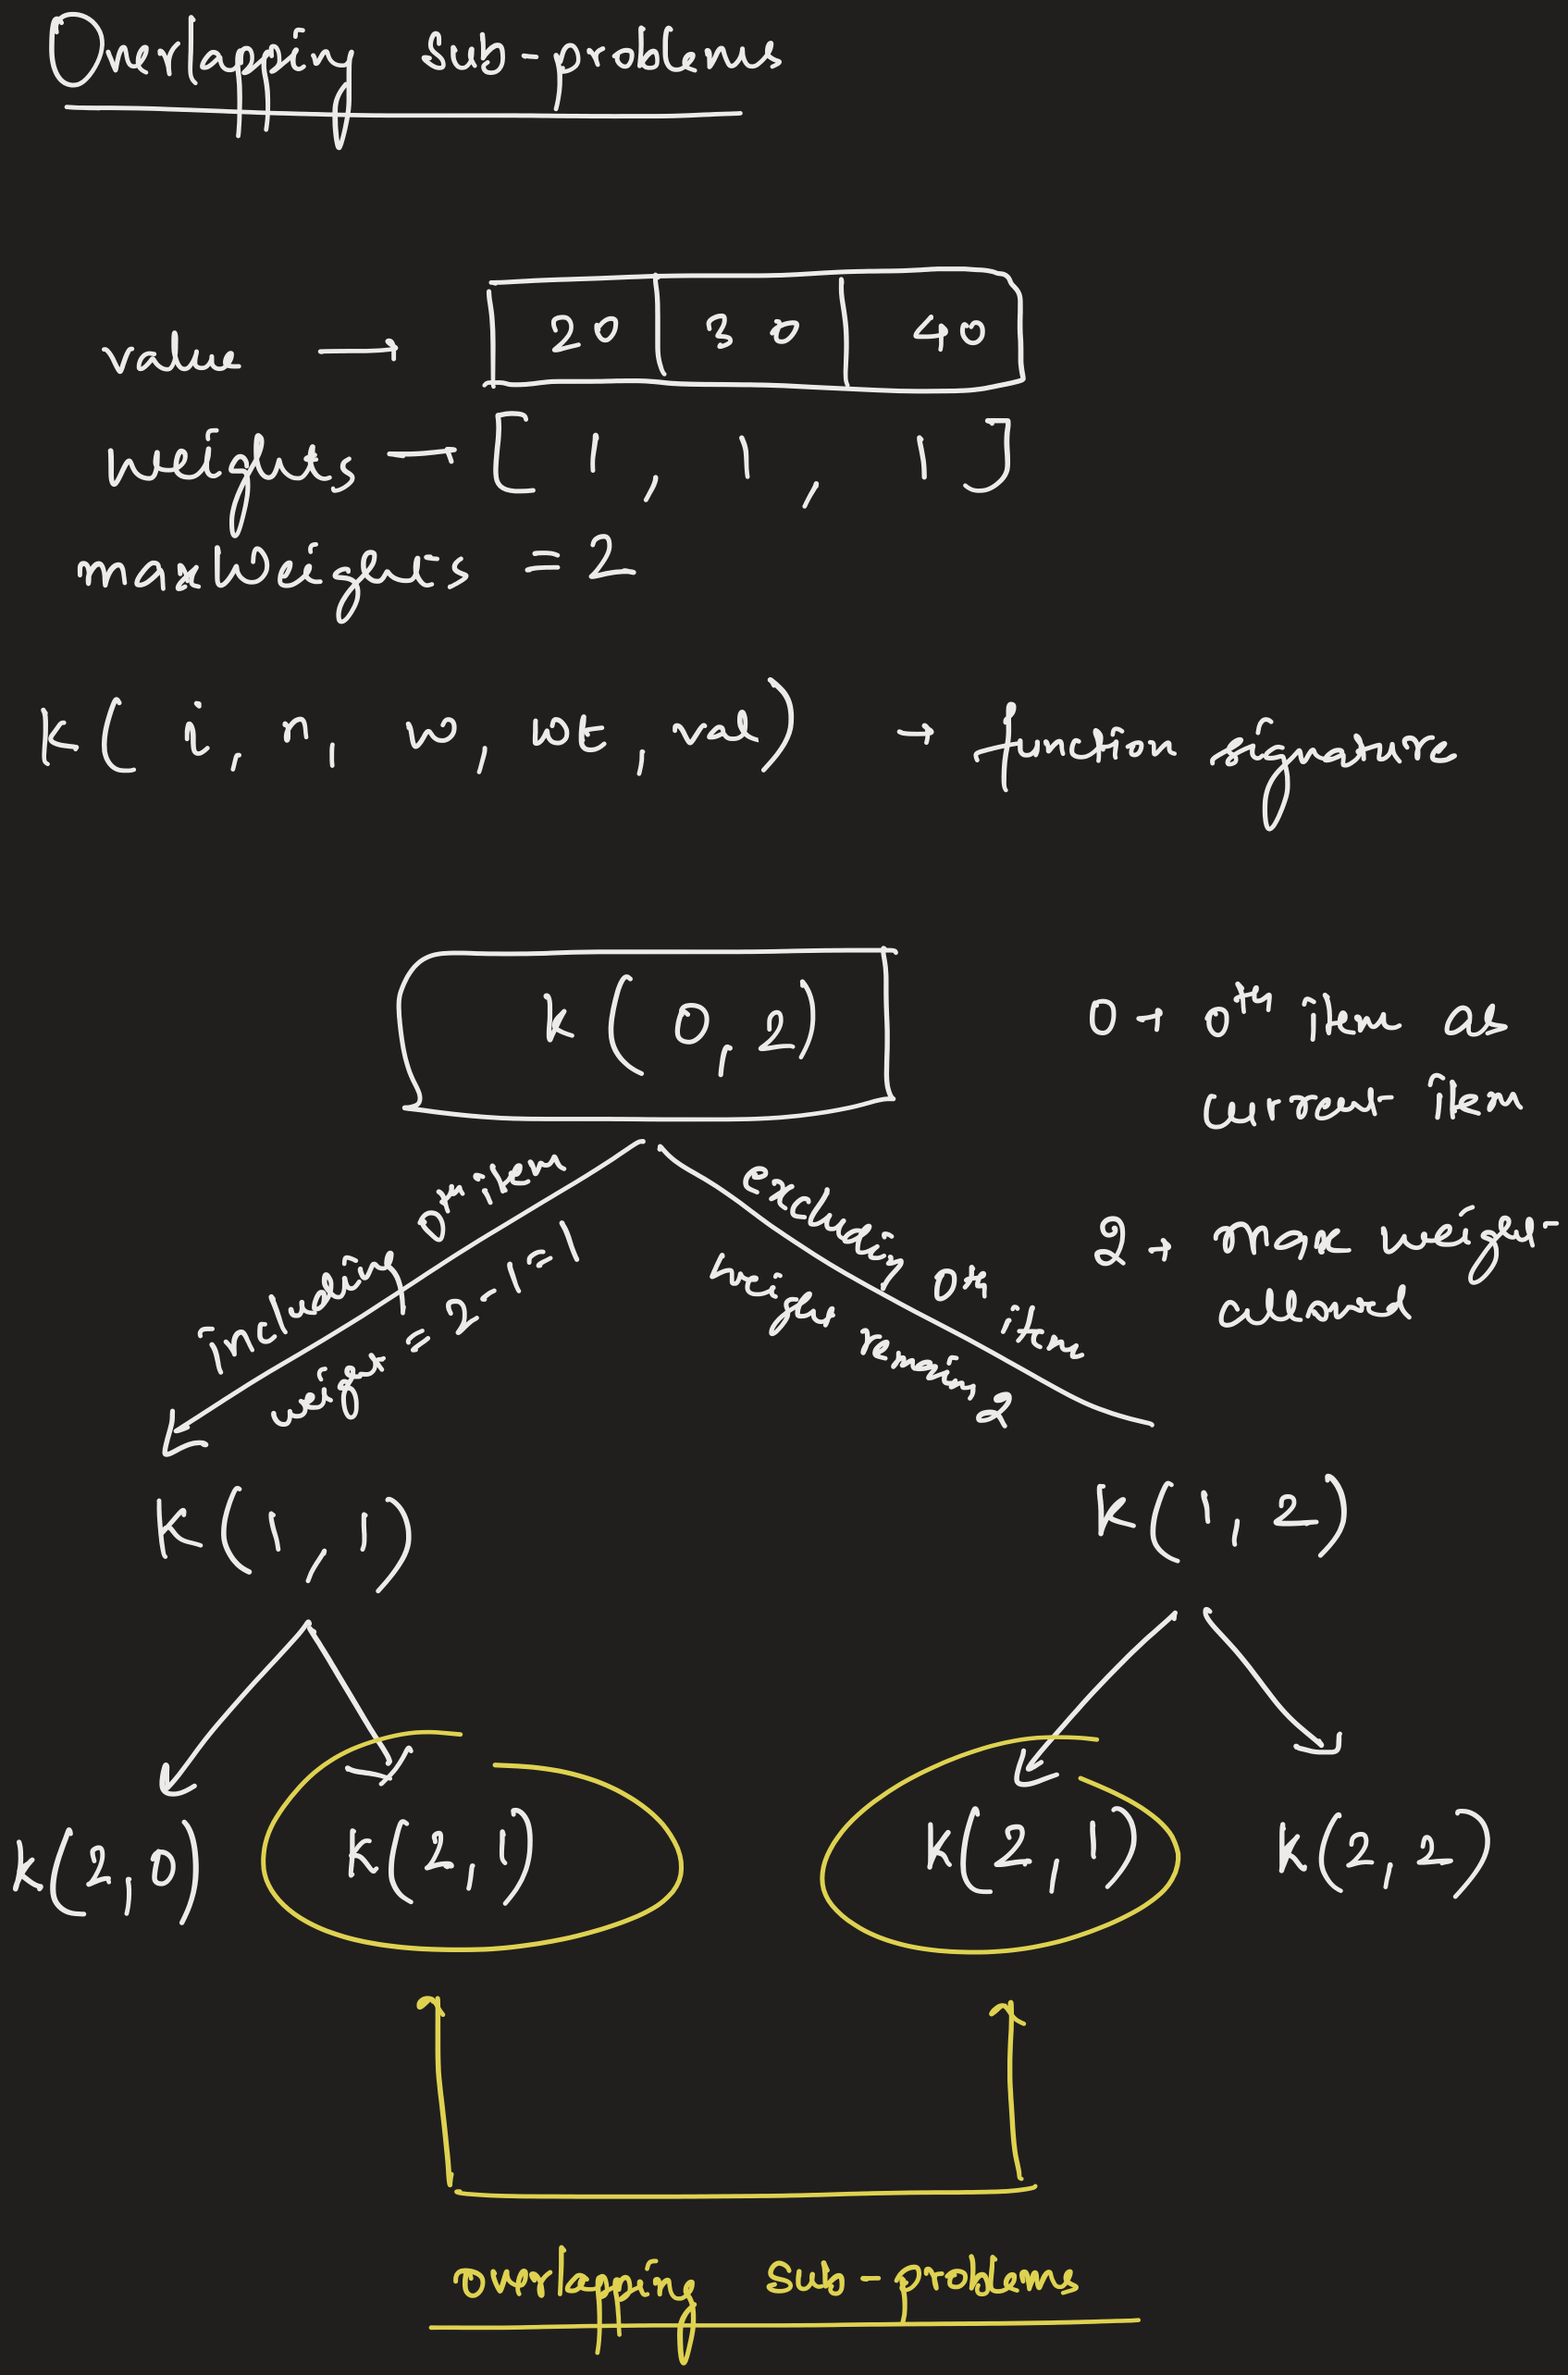

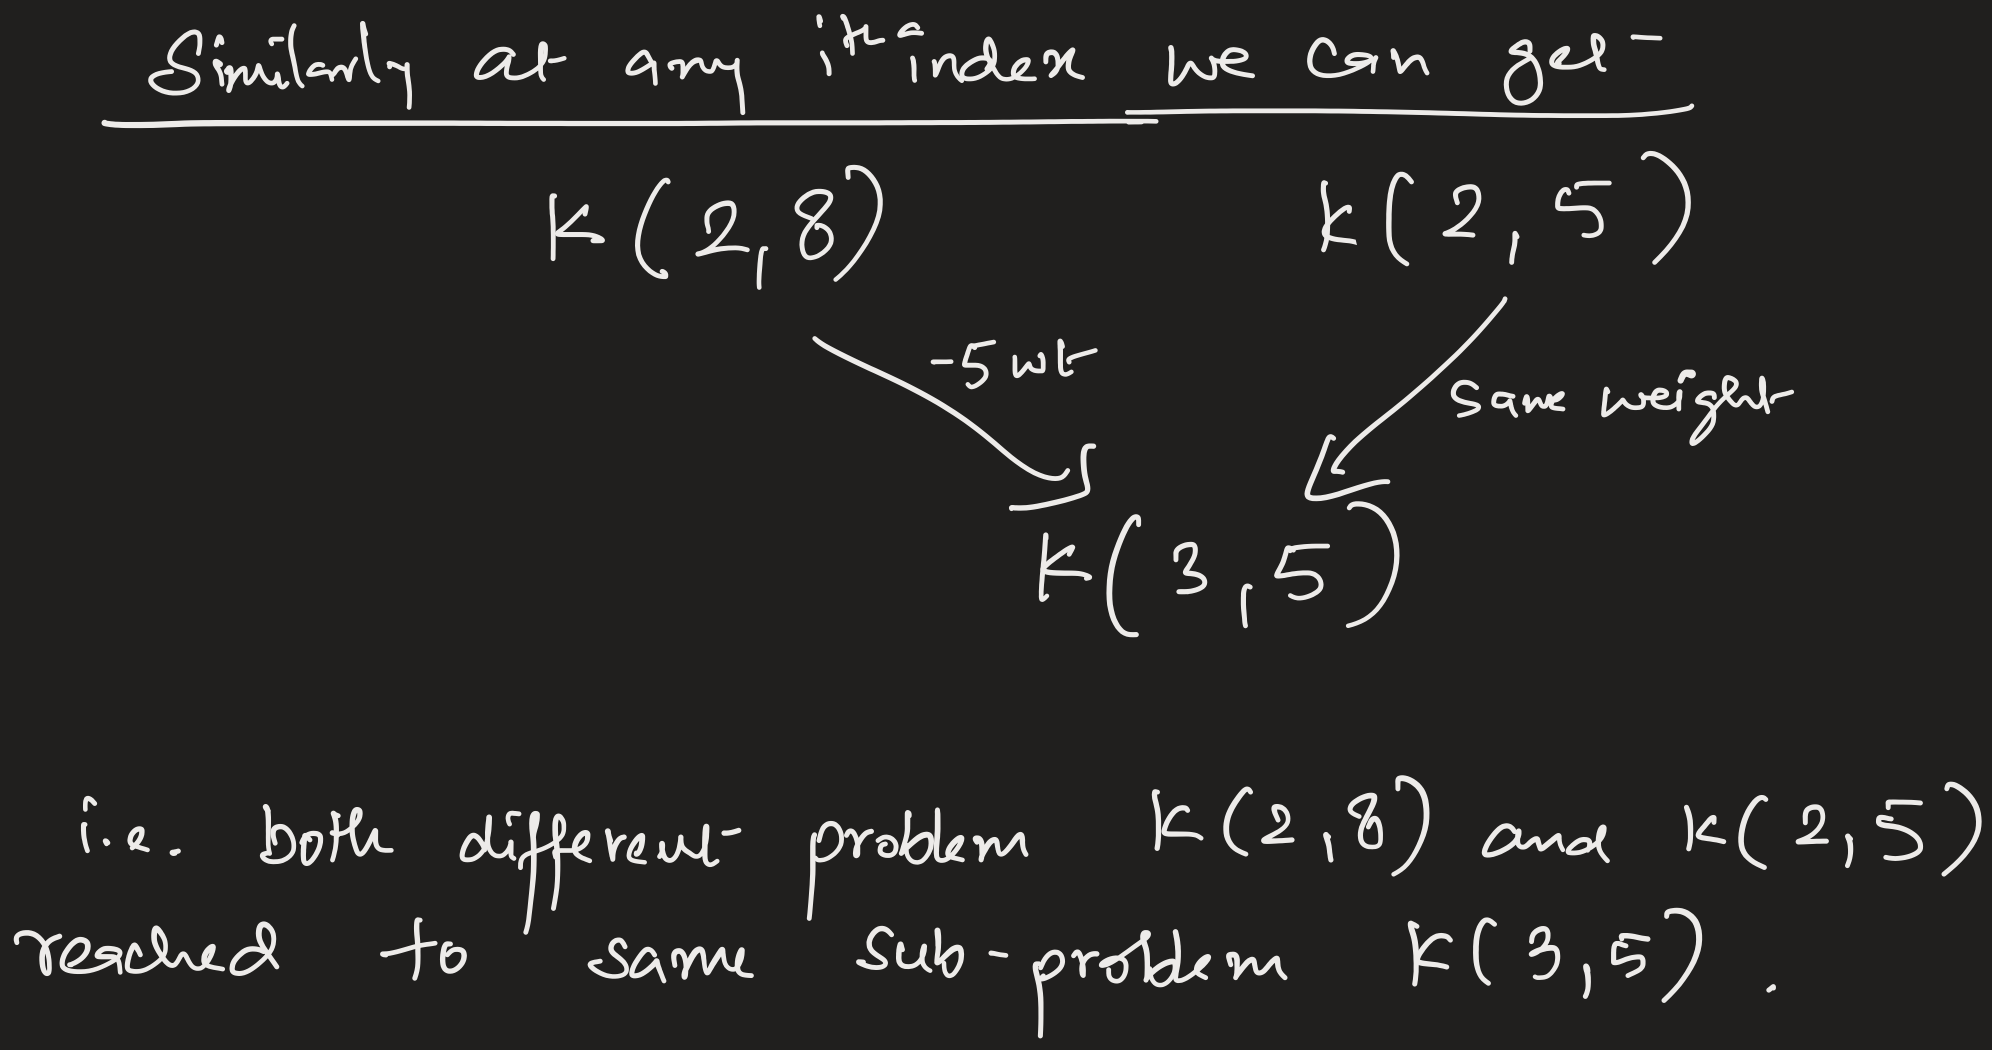

## How to apply DP to knapsack

The type of dp array being 1-D or 2-D depends on how many inputs given are changing in value.<br>
Example :<br>
1) weights array, values array -----> inputs but are constant <br>
2) Capacity/MaxWeight/W ----> Keeps changing based on if a particular element is included or not in the knapsack. If included W decreases <br>
3) n -----> number of items will always keep decreasing as it is part of "smaller-input" of the recursion. This causes atleast 1-D dp array. Here the number of items will keep decreasing as we move from last item to first with each to be included or not included in the knapsack <br>

In knapsack, since there are 2 changing inputs W and n , therefore we need a 2-D array

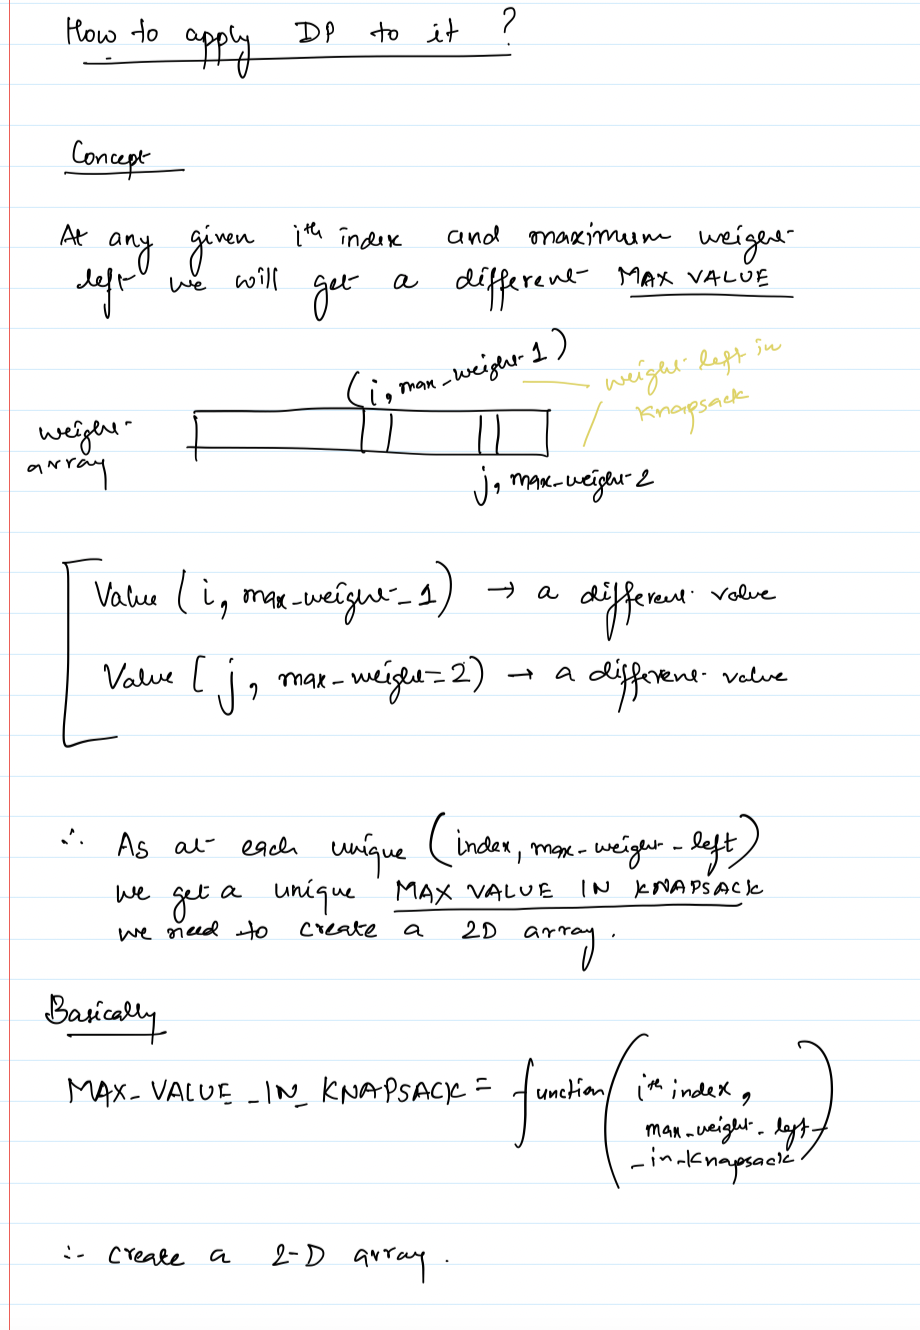

## Top-down approach :  Recursion with memoization

In [8]:
def knapsack_memoization_top_down(weights, values, n, maxWeight, dp) :
    
    if (n == 0) or (maxWeight == 0) :
        return 0
    
    if dp[n][maxWeight] != -1:
        return dp[n][maxWeight] 
    else:
        
        if weights[n - 1] > maxWeight :
            dp[n][maxWeight]  = knapsack_memoization_top_down(weights, values, n - 1, maxWeight, dp)
        else:
            includeItem = values[n - 1] + knapsack_memoization_top_down(weights, values, n - 1, maxWeight - weights[n- 1], dp)
            excludeItem = knapsack_memoization_top_down(weights, values, n - 1, maxWeight, dp)
        
            dp[n][maxWeight]  = max(includeItem, excludeItem)
    
    return dp[n][maxWeight]



In [9]:
n = 4
weights = [1, 2, 4, 5]
values = [5, 4, 8, 6]
maxWeight = 5

dp = [[ -1 for j in range(maxWeight+1)] for i in range(n+1)]
answer = knapsack_memoization_top_down(weights, values, n, maxWeight, dp)

print("knapsack value", answer)

print("\nDP ARRAY")
for i in range(len(dp)):
    print(dp[i])

knapsack value 13

DP ARRAY
[-1, -1, -1, -1, -1, -1]
[-1, 5, -1, 5, -1, 5]
[-1, 5, -1, -1, -1, 9]
[-1, -1, -1, -1, -1, 13]
[-1, -1, -1, -1, -1, 13]


## Bottom-up approach

Difference between top-down approach and bottom-up approach

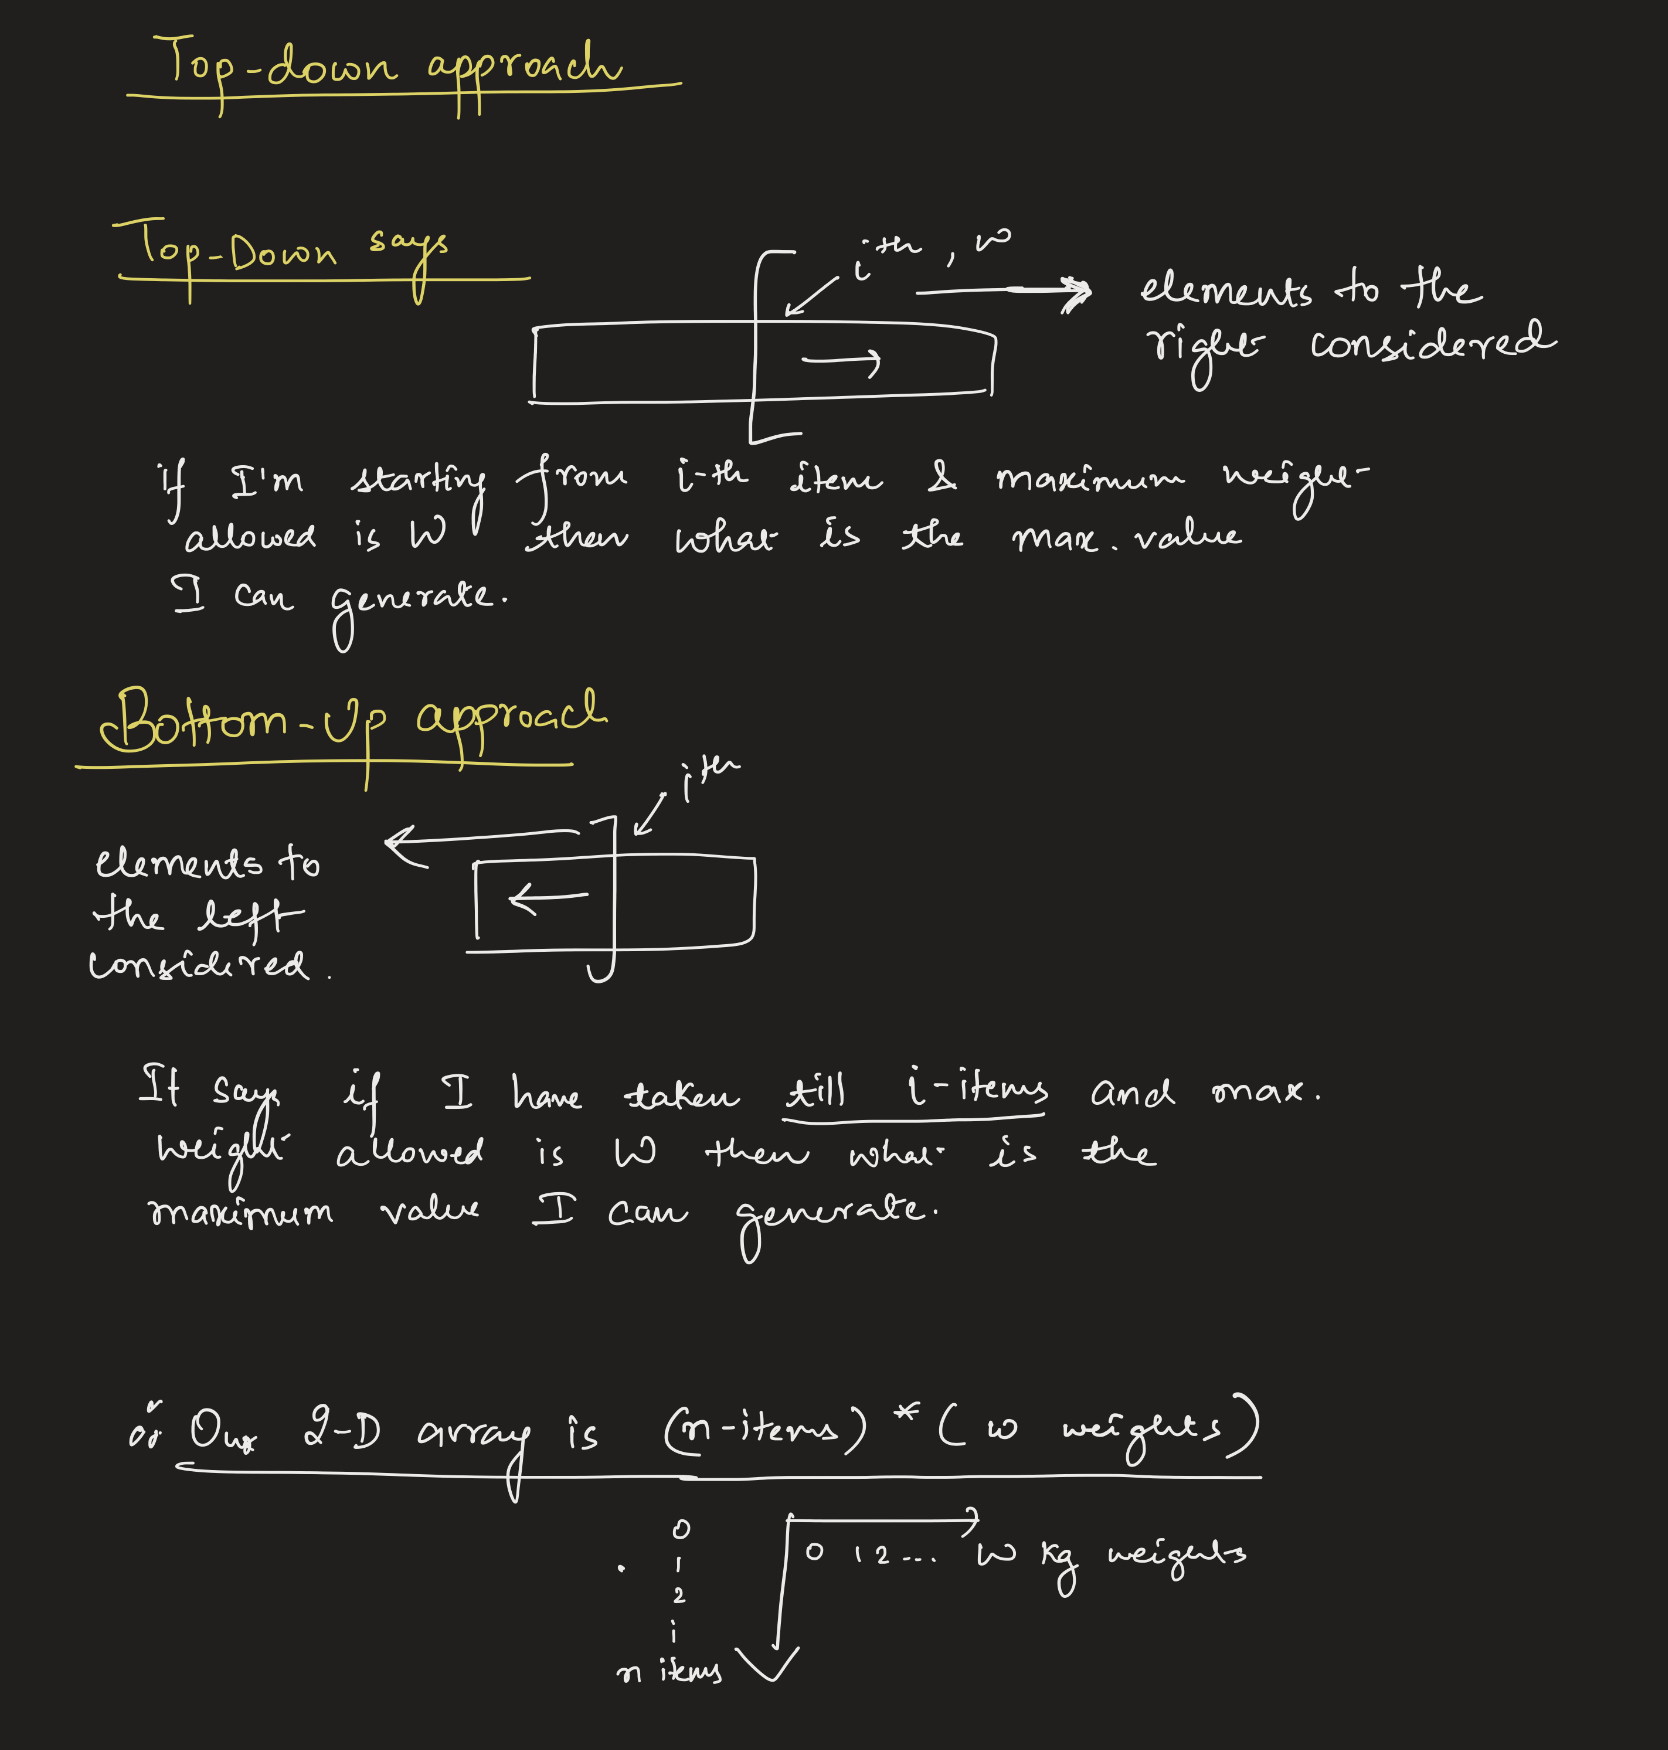

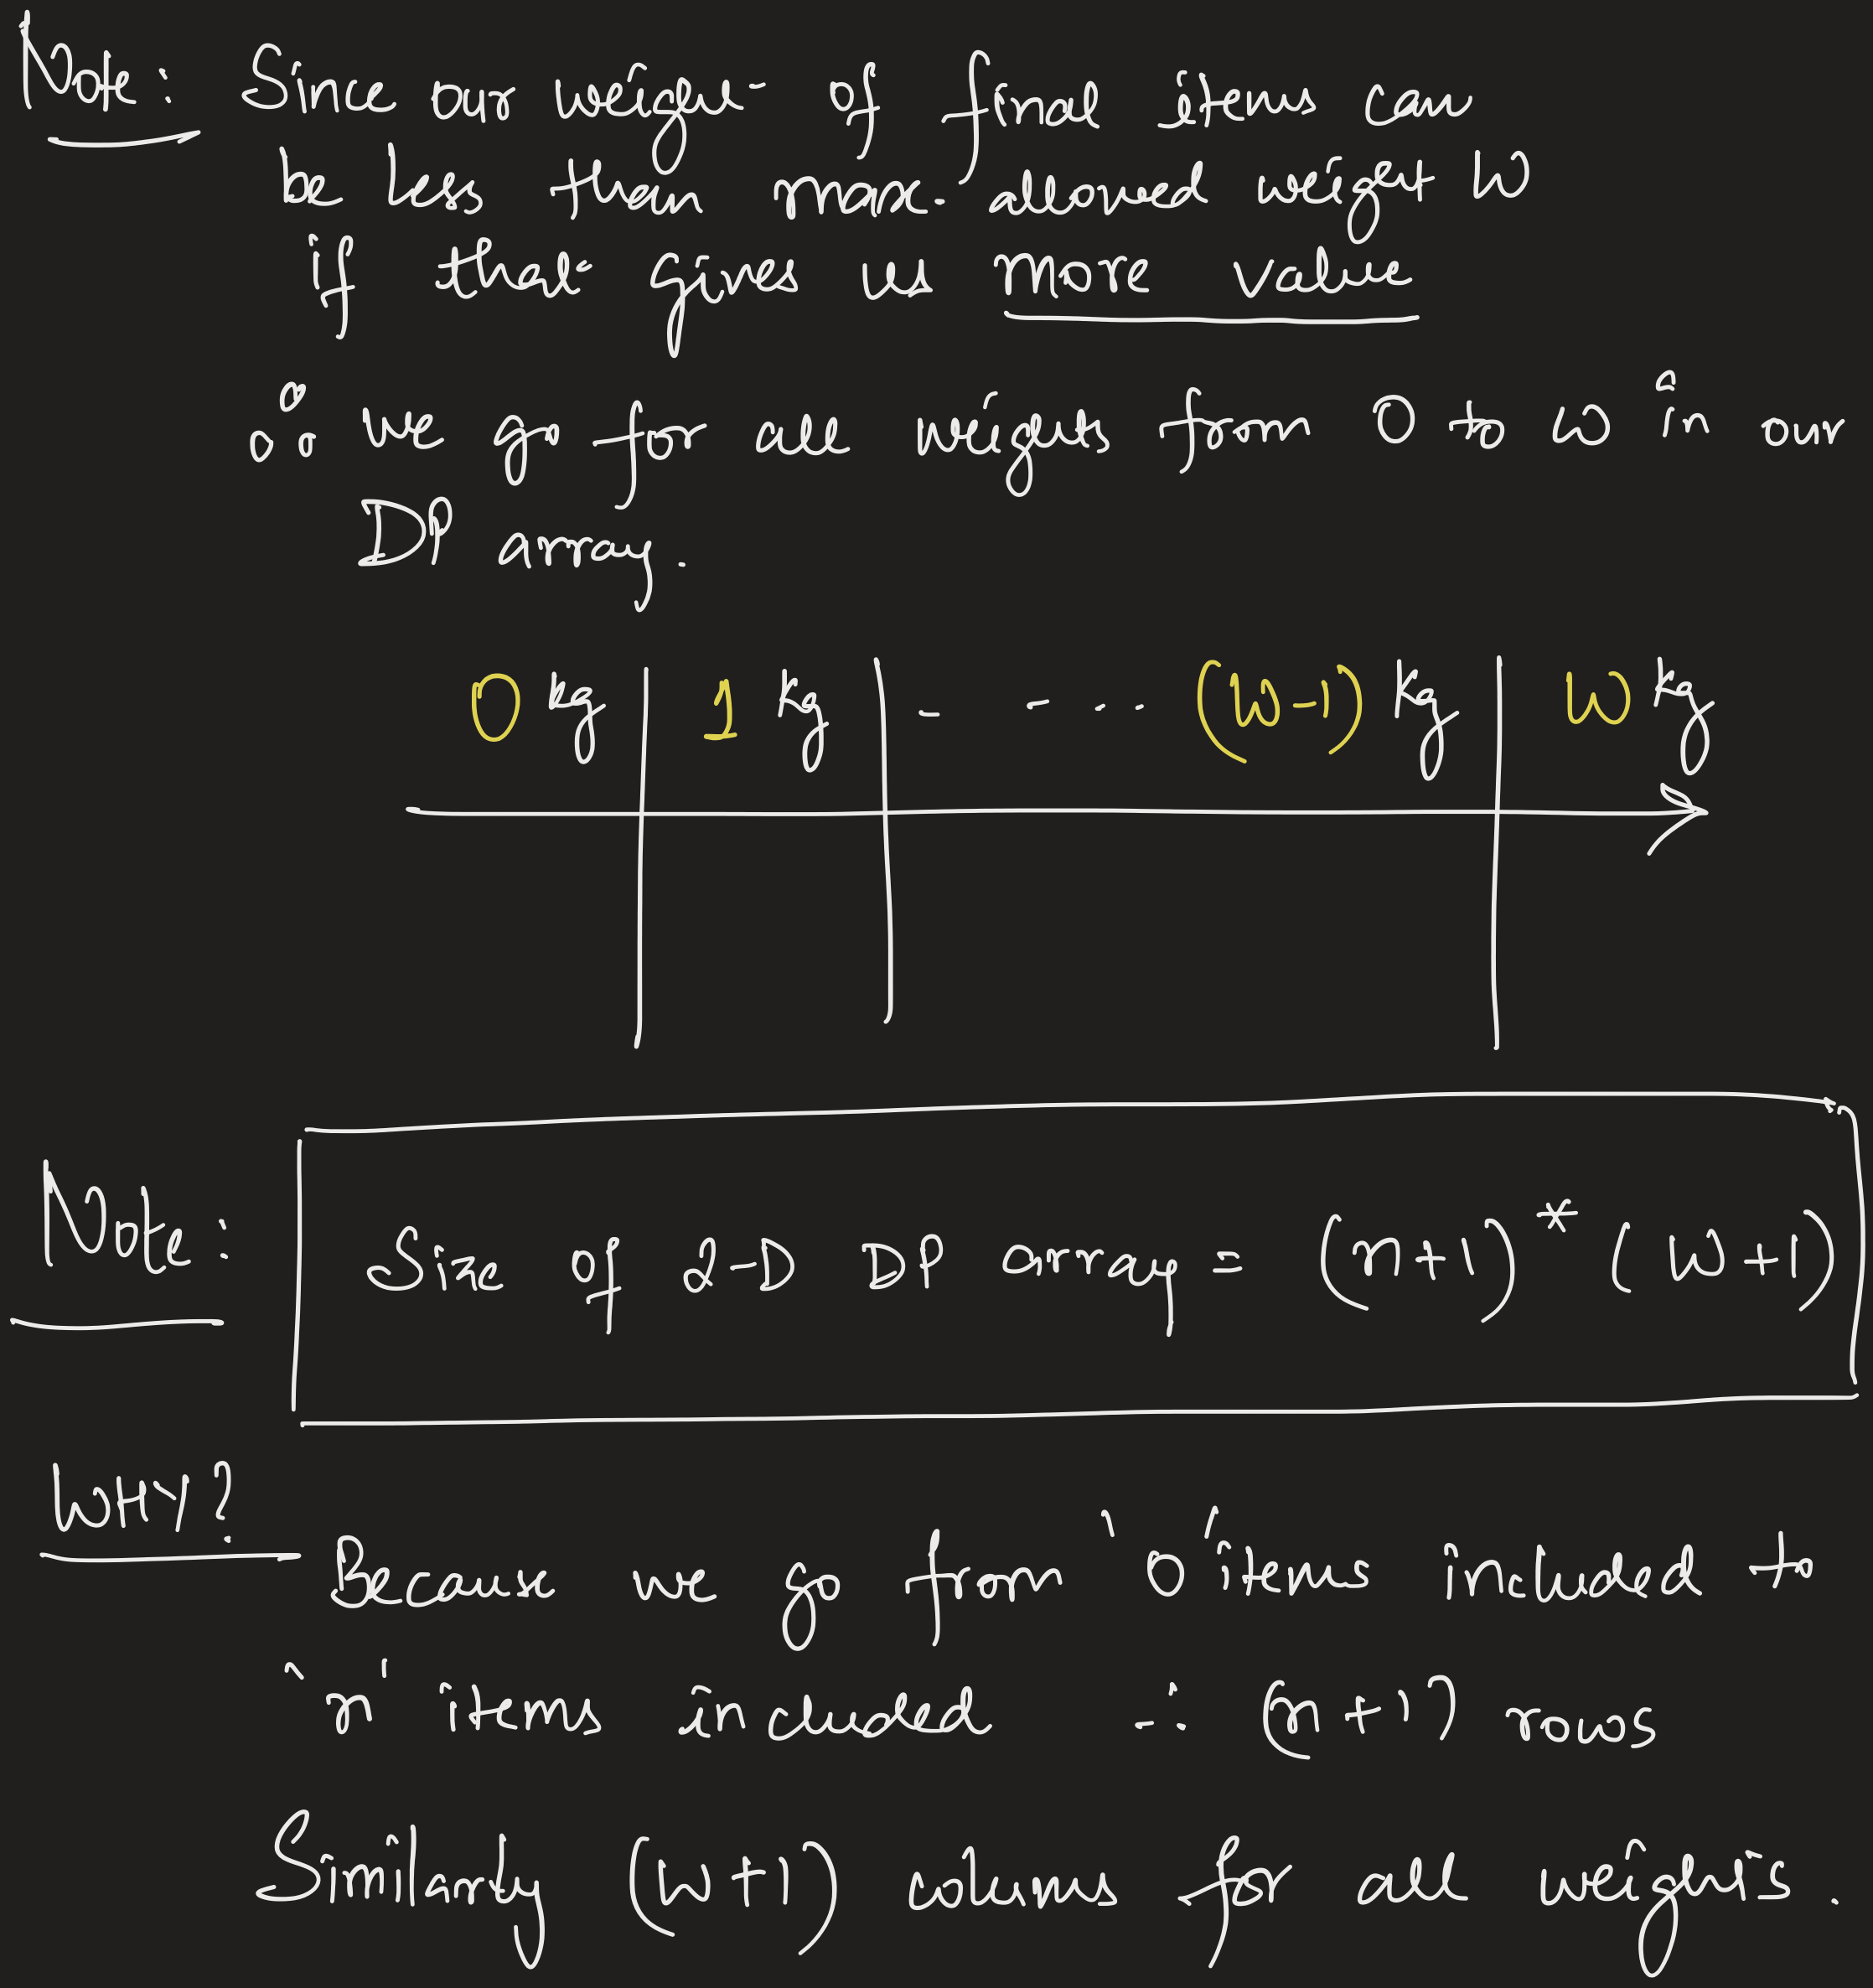

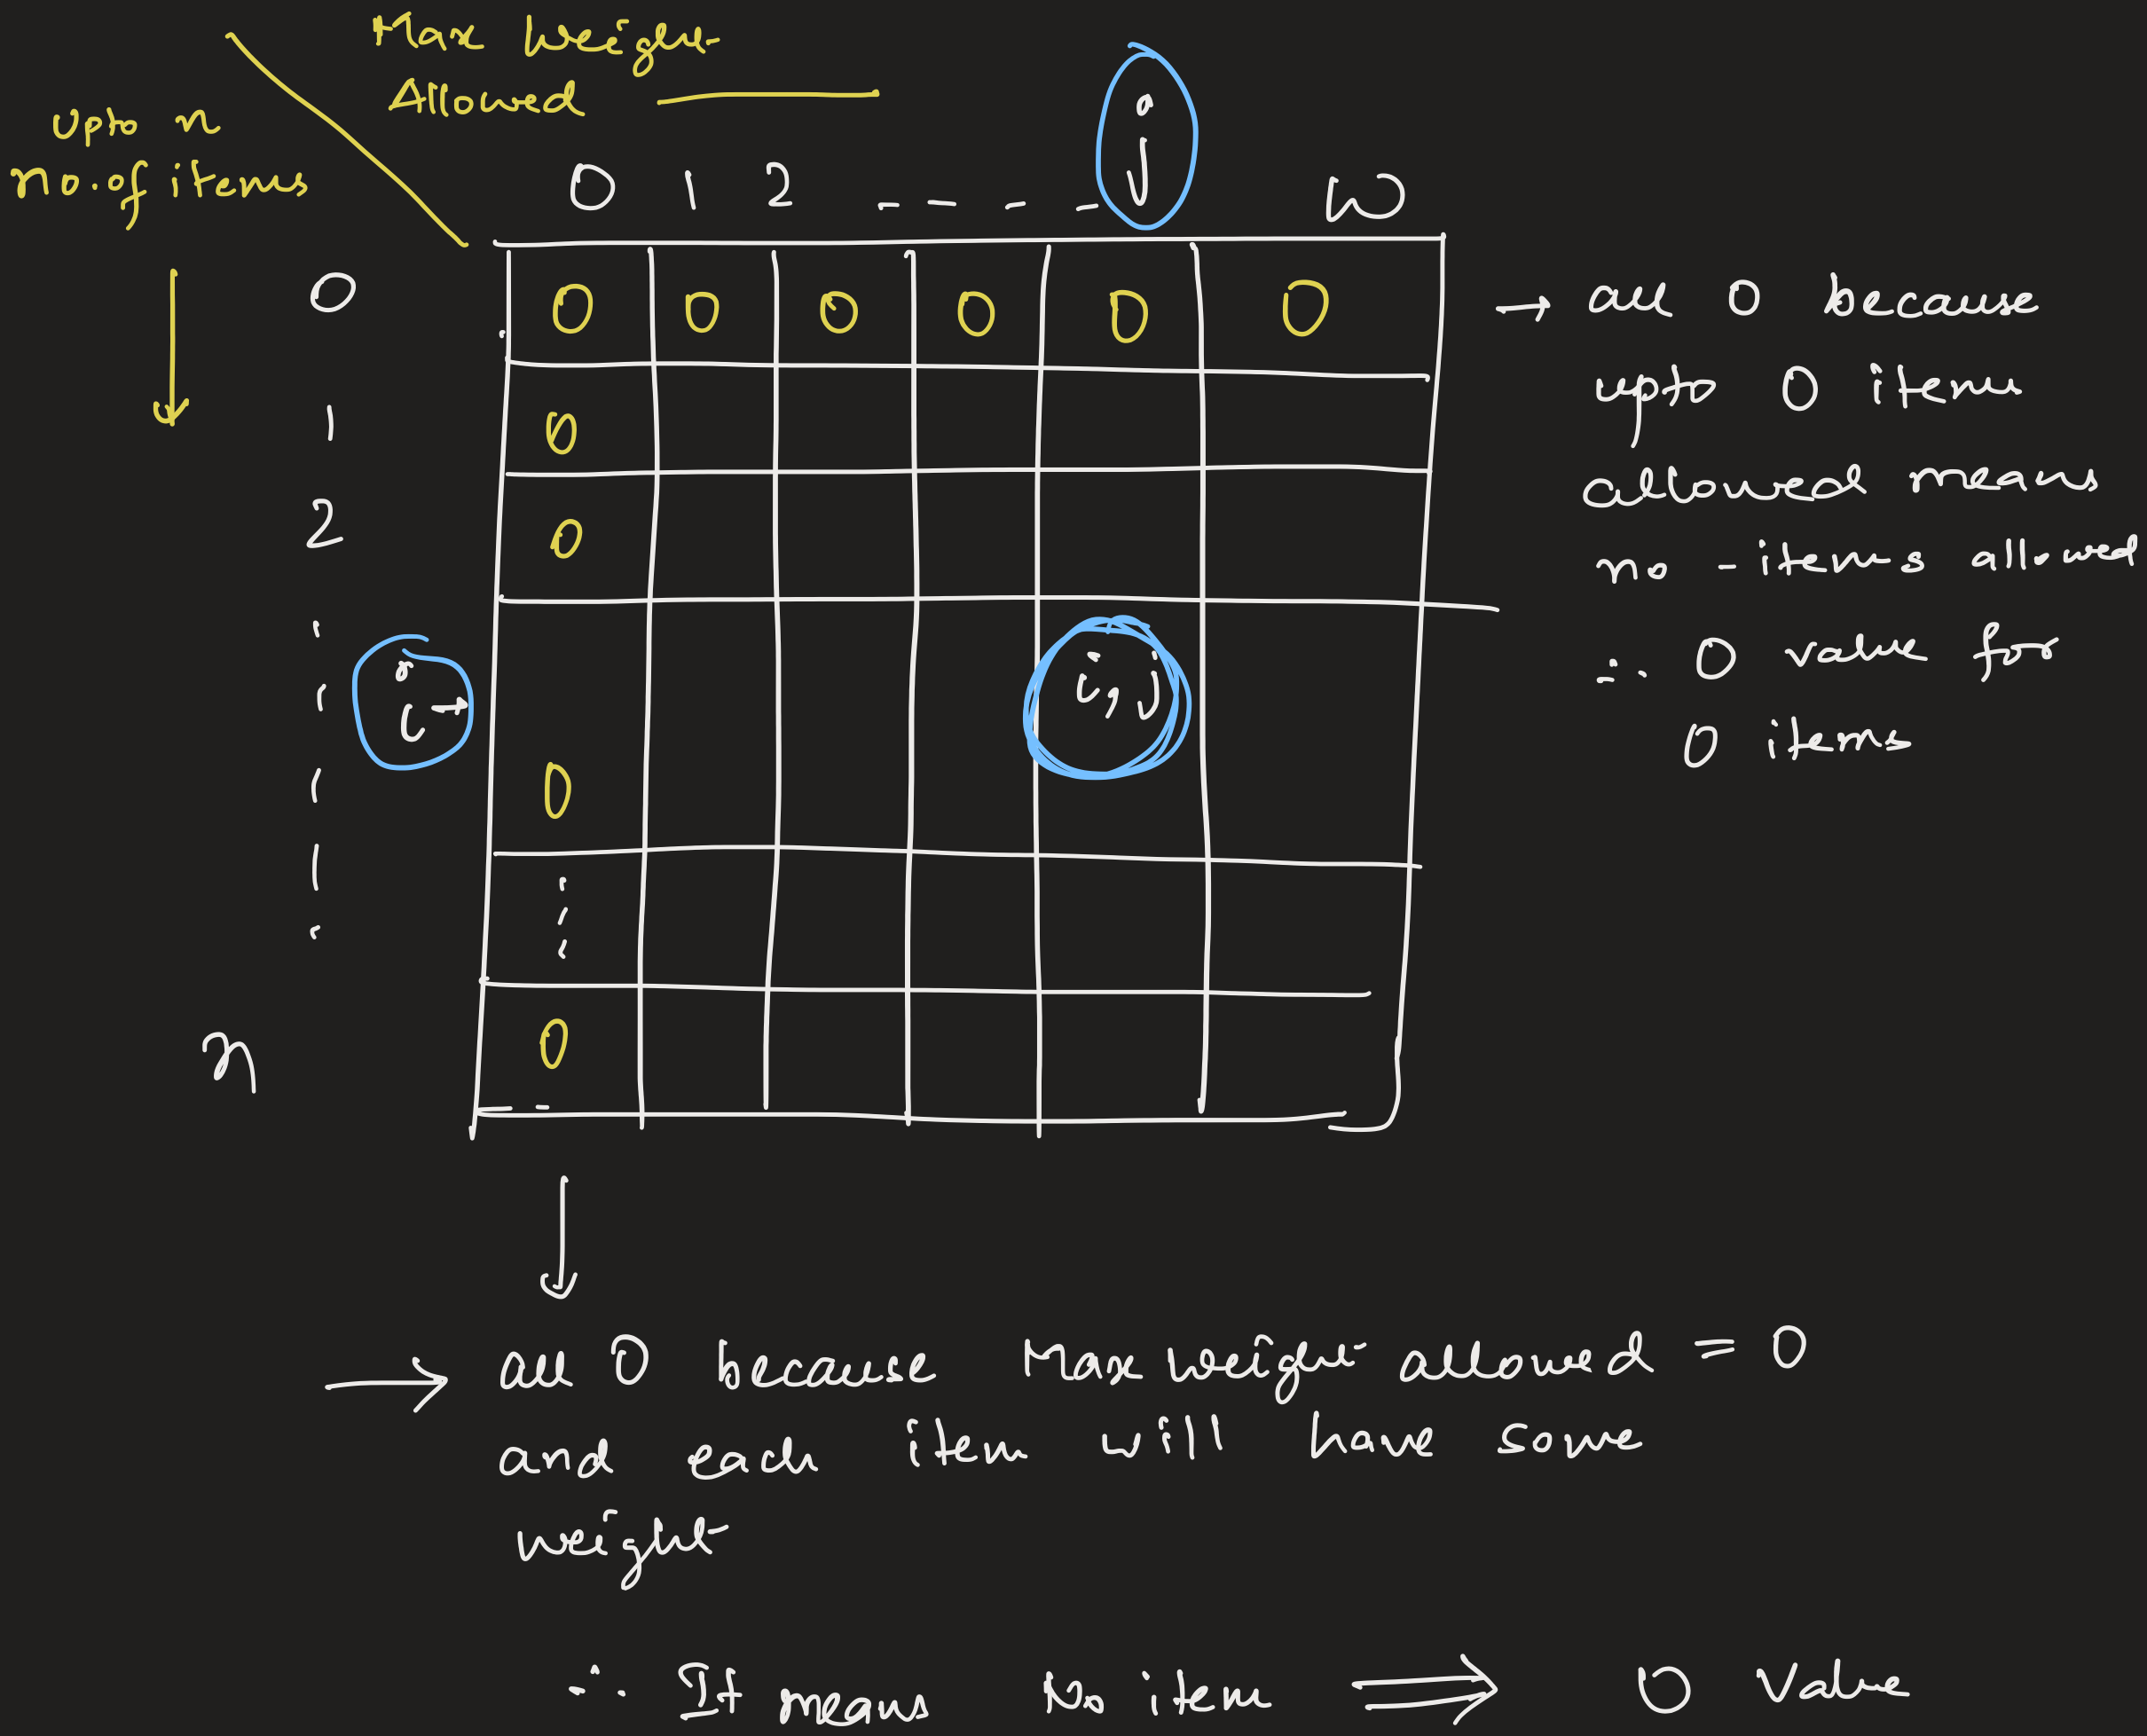

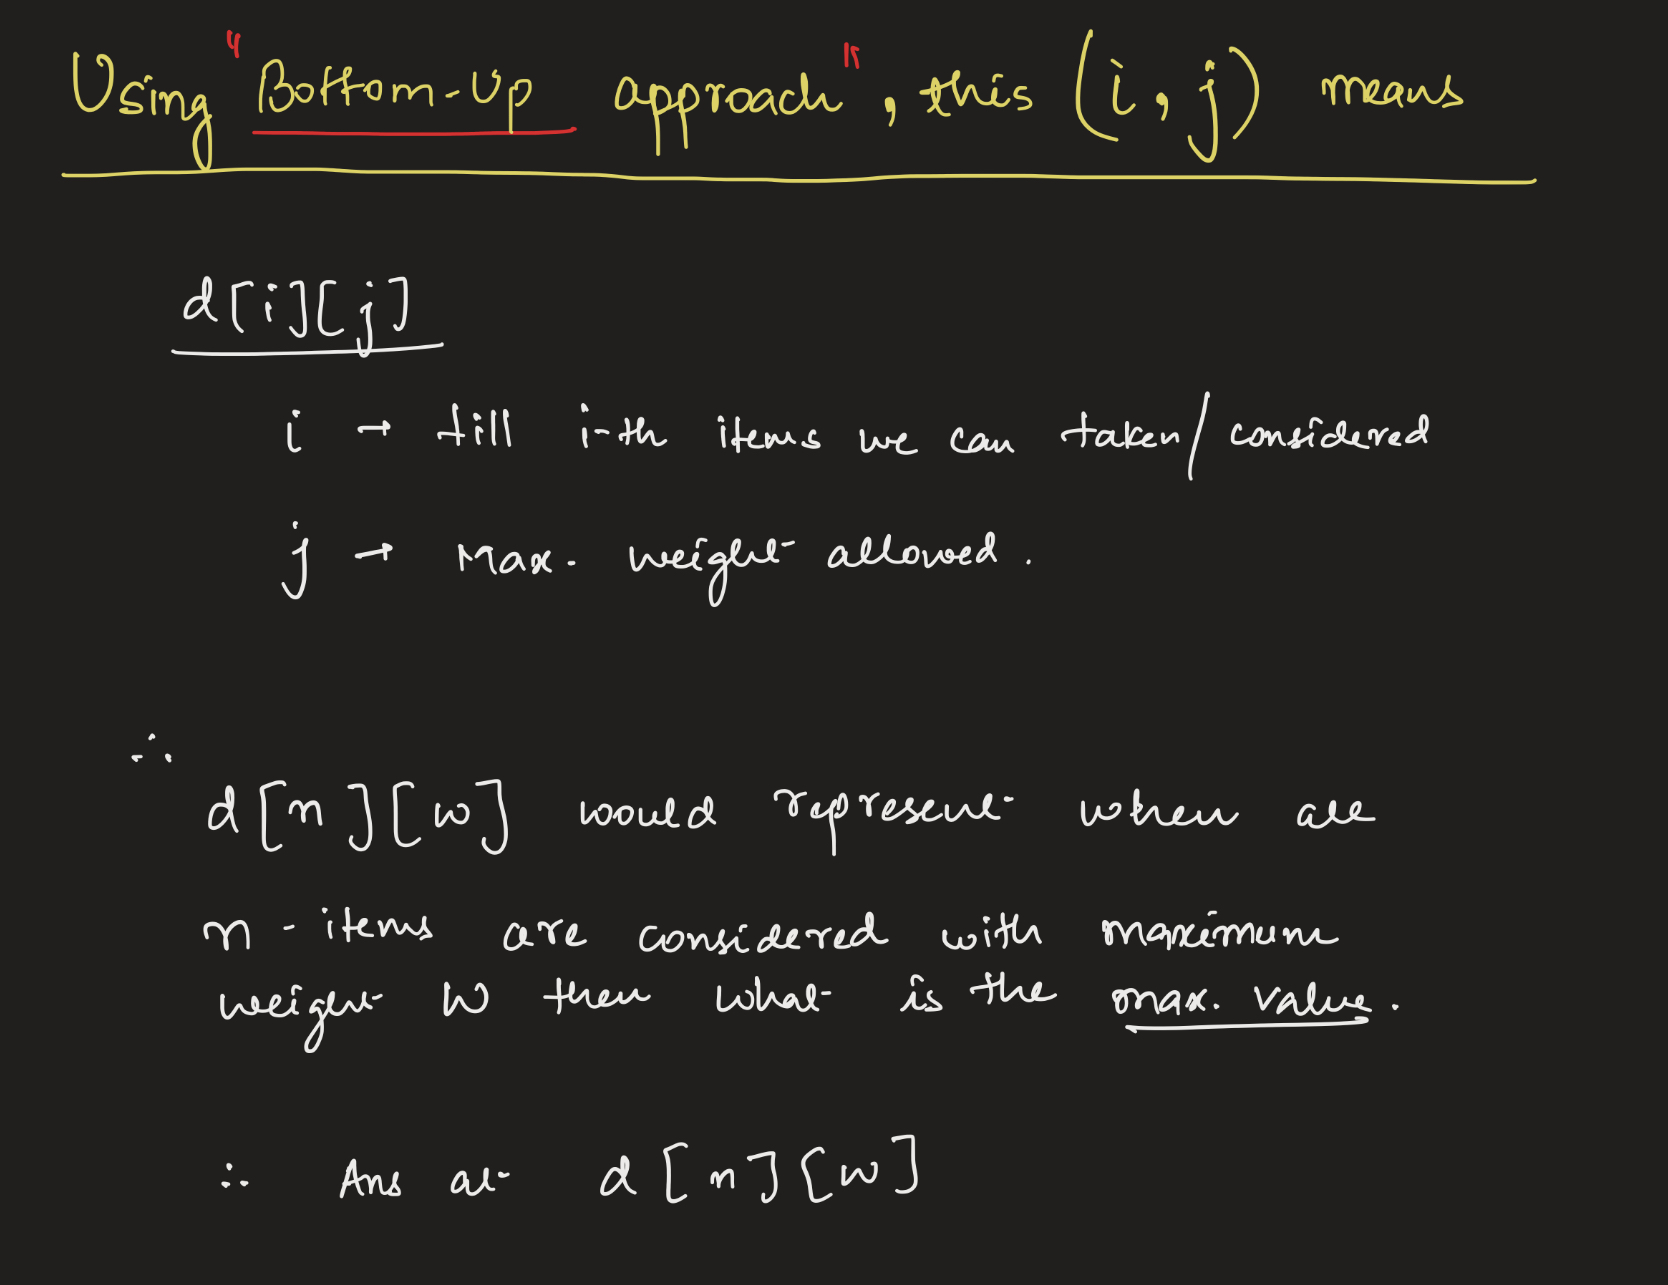

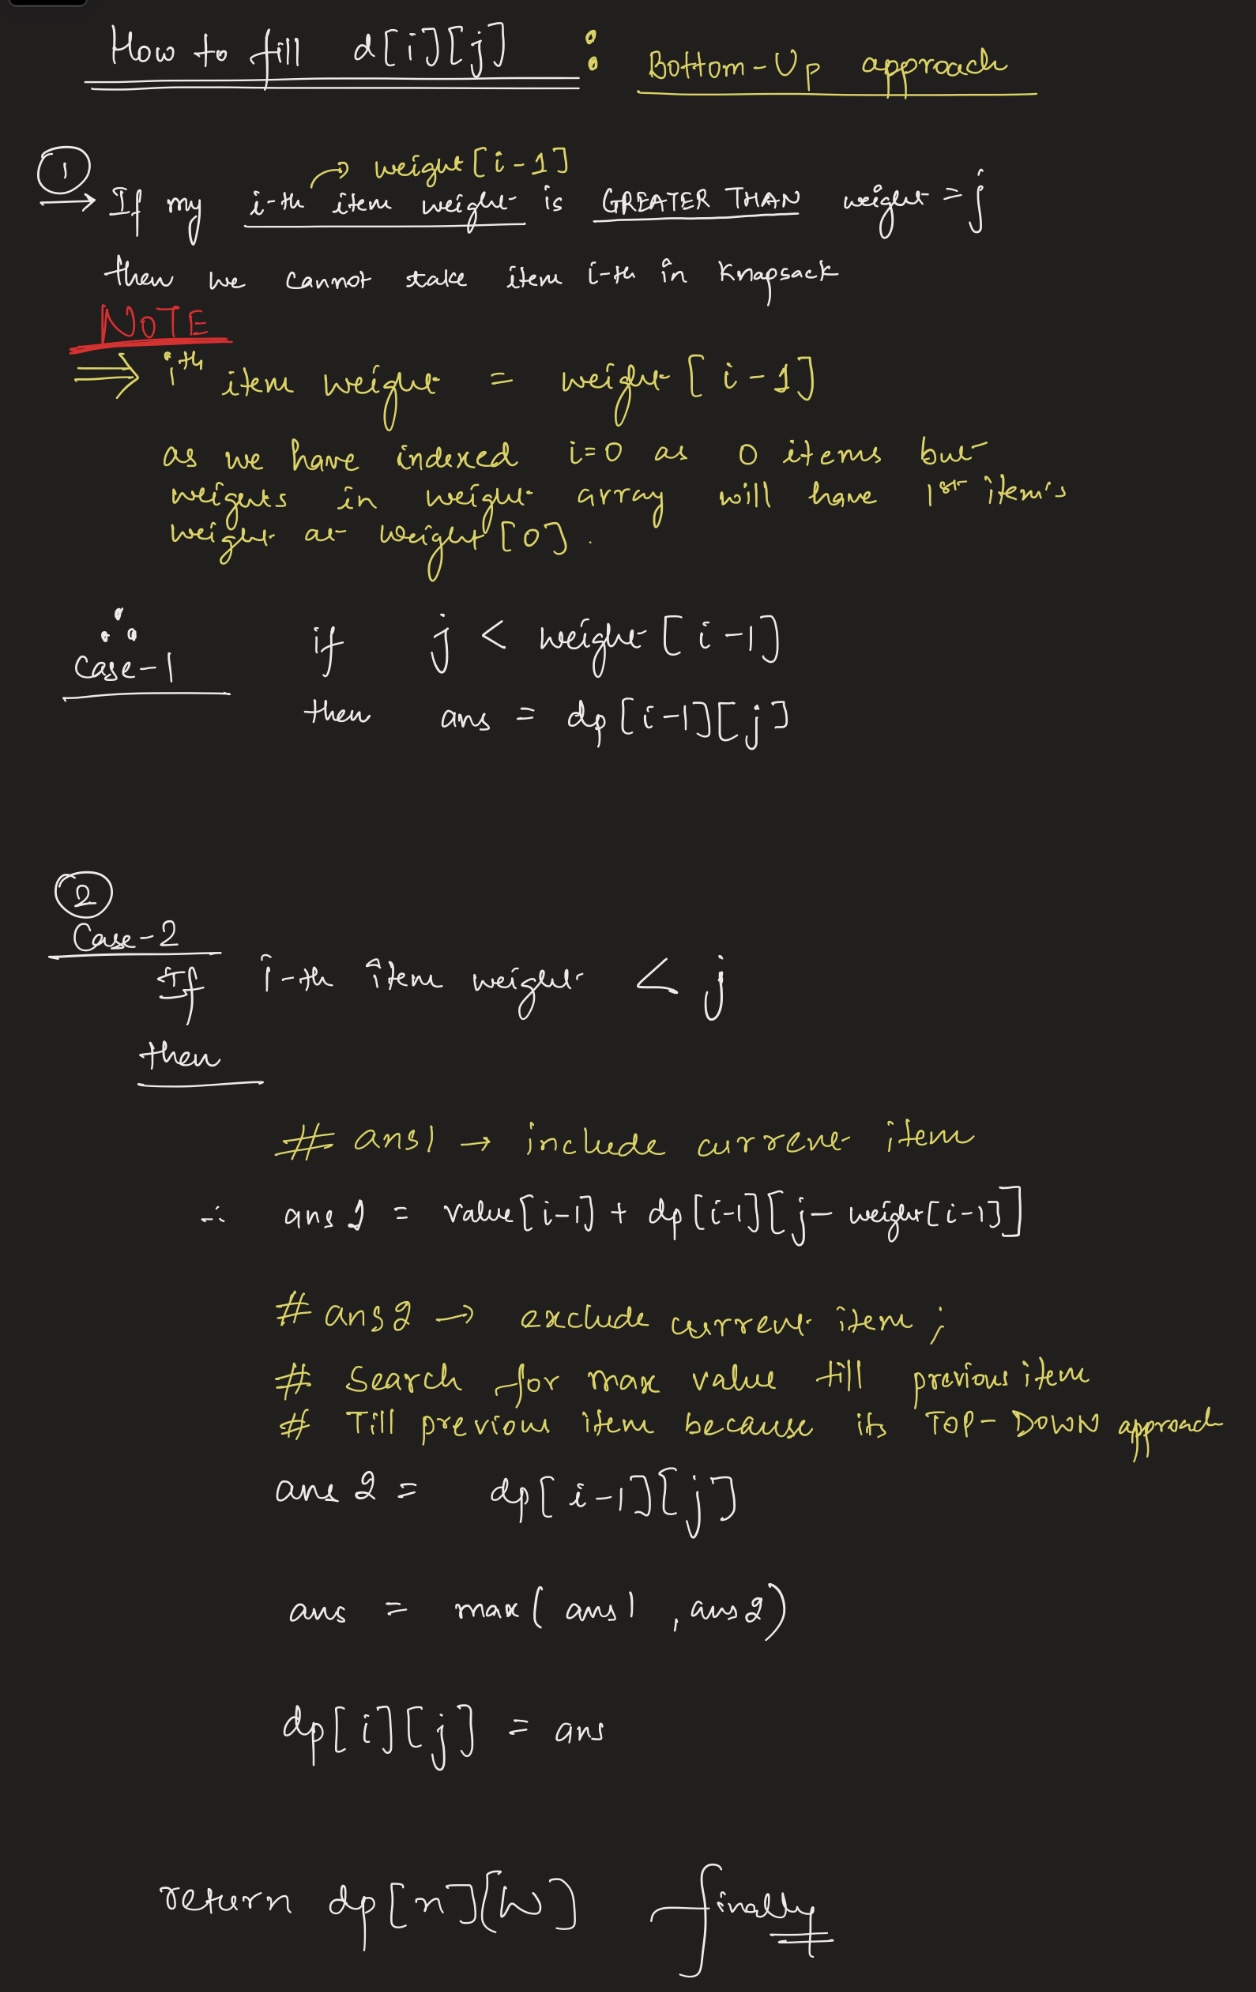

In [5]:
def knapsack_bottom_up_iterative(weights, values, W):
    
    n = len(weights) # n = number of items
    
    # since max_weight = W , our possible weights ranges from 0 to W, which indicates number of columns = W+1
    # initializing with 0 so that for n=0 items, we get 0 maximum value ; for W=0 i.e max_Weight=0 we get max value 0
    # this covers our base-case
    
    dp = [[0 for _ in range(W+1)] for __ in range(n+1)]
    
    for i in range(1, n+1):
        for j in range(1, W+1):
            
            if weights[i-1] > j: 
                ans = dp[i-1][j] # if i-th item weight is greater than CURRENT max_weight "j", then we can exclude it
                                # this means when max_weight allowed = j, best value can be with (i-1) items
            else:
                # calculate value when you include i-th item from knapsack, subtract i-th item weight too
                ans1 = values[i-1] + dp[i-1][j - weights[i-1]] # this basically says what is the maximum value you
                # can generate from (i-1) items within this reduced weight
                
                # calculate value when you exclude the i-th item from knapsack
                ans2 = dp[i-1][j]
                
                # take maximum of the 2 values to find most valuable knapsack formed
                ans = max(ans1, ans2)
                
            dp[i][j] = ans # store the answer
                
    return dp  # in top-down approach you will get your answer in the end of the 2D DP array
    
    

In [6]:
weights = [5, 4, 2, 1]
values = [5, 4, 8, 6]
maxWeight = 9

n = len(values)
W = maxWeight

dp = knapsack_bottom_up_iterative(weights, values, maxWeight)

print("knapsack value", dp[n][W])

print("\nDP ARRAY")
for i in range(len(dp)):
    print(dp[i])

knapsack value 19

DP ARRAY
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 5, 5, 5, 5, 5]
[0, 0, 0, 0, 4, 5, 5, 5, 5, 9]
[0, 0, 8, 8, 8, 8, 12, 13, 13, 13]
[0, 6, 8, 14, 14, 14, 14, 18, 19, 19]


In [7]:
weights = [1, 2, 4, 5]
values = [5, 4, 8, 6]
maxWeight = 5

n = len(values)
W = maxWeight

dp = knapsack_bottom_up_iterative(weights, values, maxWeight)


print("knapsack value", dp[n][W])

print("\nDP ARRAY")
for i in range(len(dp)):
    print(dp[i])

knapsack value 13

DP ARRAY
[0, 0, 0, 0, 0, 0]
[0, 5, 5, 5, 5, 5]
[0, 5, 5, 9, 9, 9]
[0, 5, 5, 9, 9, 13]
[0, 5, 5, 9, 9, 13]
